First, we need to import a few modules and use some define some settings for figures.

In [47]:
import matplotlib.pyplot as pp
from utils import *
from sinc import *
from FIM import *
import os
%matplotlib inline
pp.rcParams['figure.dpi'] = 150
%config InlineBackend.figure_format = 'retina'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

We define the structure of the network and the size of each training set. Then we can load in our trained network.

In [48]:
dimensions = [200*1] + [1024]*8 + [1*6]
percival_network = makenet(dimensions, softmax=False)

network_to_use = percival_network()

size=100000 #number training data

In [49]:
#loading the network
#network_to_use.load_state_dict(torch.load(r"C:\Users\Luke\year-4-project-lisa\Luke\Term-2\ToyModel_Sinc\Trained-Models\ToyModel_sinc_l200-1024x8_2d_10000it.pt", map_location=torch.device('cpu')))
network_to_use.load_state_dict(torch.load(r"C:\Users\lukes\year-4-project-lisa\year-4-project-lisa\Luke\Term-2\ToyModel_Sinc\Trained-Models\ToyModel_sinc_l200-1024x8_2d_10000it.pt", map_location=torch.device('cpu')))
network_to_use.eval()

Net(
  (fc0): Linear(in_features=200, out_features=1024, bias=True)
  (fc1): Linear(in_features=1024, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=1024, bias=True)
  (fc5): Linear(in_features=1024, out_features=1024, bias=True)
  (fc6): Linear(in_features=1024, out_features=1024, bias=True)
  (fc7): Linear(in_features=1024, out_features=1024, bias=True)
  (fc8): Linear(in_features=1024, out_features=6, bias=True)
)

We need to generate batches of test signals for the network to evaluate and compare these to the likelihood estimate. We generate 5000 signals in the same region the network was trained on.

In [50]:
mutest = syntrain(5000, region=[[5,10],[45,55]], varx=['Mc', 'tc'], noise=1)
Mc = mutest[0][:,0]
tc = mutest[0][:,1]
idx = np.argsort(Mc)

In [89]:
#generate signals without noise to compare with network prediction
likeset_Mc = lambda: syntrain(size=100000, varx='Mc', region=region, noise=0)
likeset_tc = lambda: syntrain(size=100000, varx='tc', region=region, noise=0)

In [ ]:
%%time
sl_Mc = synlike(mutest[2][:24,:], likeset_Mc, iterations=10000000)

In [7]:
%%time
sl_tc = synlike(mutest[2][:24,:], likeset_tc, iterations=10000000)

Wall time: 8min 33s


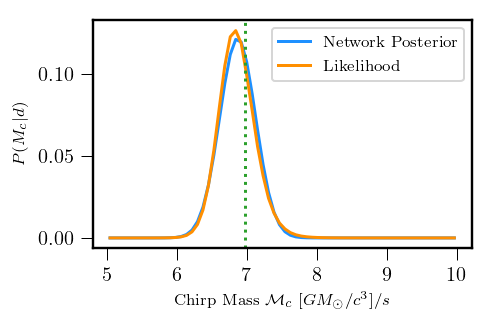

In [33]:
#plotting the results
plotgauss(*mutest, net=network_to_use, varx='Mc', like=sl_Mc, twodim=True, istart=9)

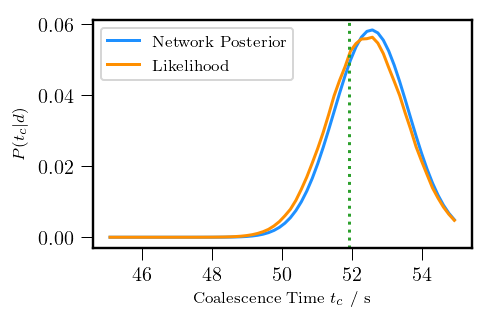

In [32]:
plotgauss(*mutest, net=network_to_use, varx='tc', like=sl_tc, twodim=True, istart=9)

In [90]:
%%time
likeset_2 = lambda: syntrain(size=100000, varx=['Mc','tc'], region=[[5,10],[45,55]], noise=0)
#sl2 = synlike(mutest[2][:10,:], likeset_2, iterations=10000000)

Wall time: 0 ns


C:\Users\lukes\Python\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)


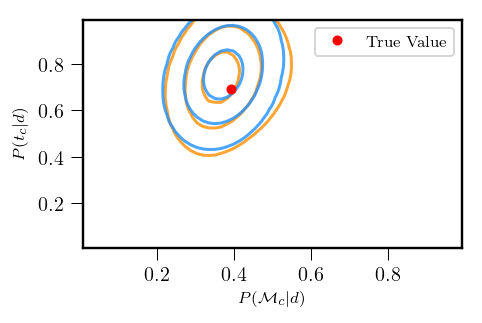

In [31]:
makecontour(*mutest, net=network_to_use, like=sl2, istart=9)

Next we compare the fisher information  matrix sigma values with those from the network.

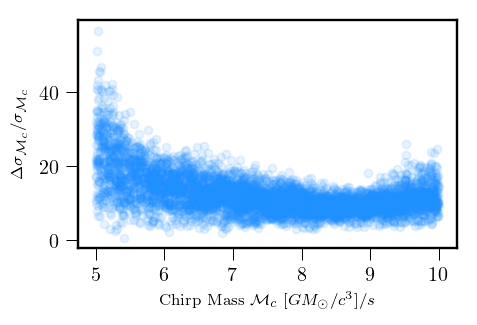

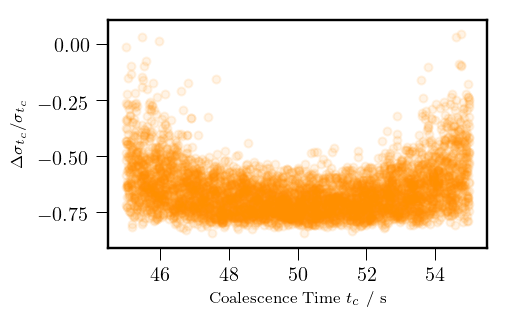

In [8]:
plotsigma(*mutest, net=network_to_use)

Now we evaluate the self-consistency of our network using a P-P plot.

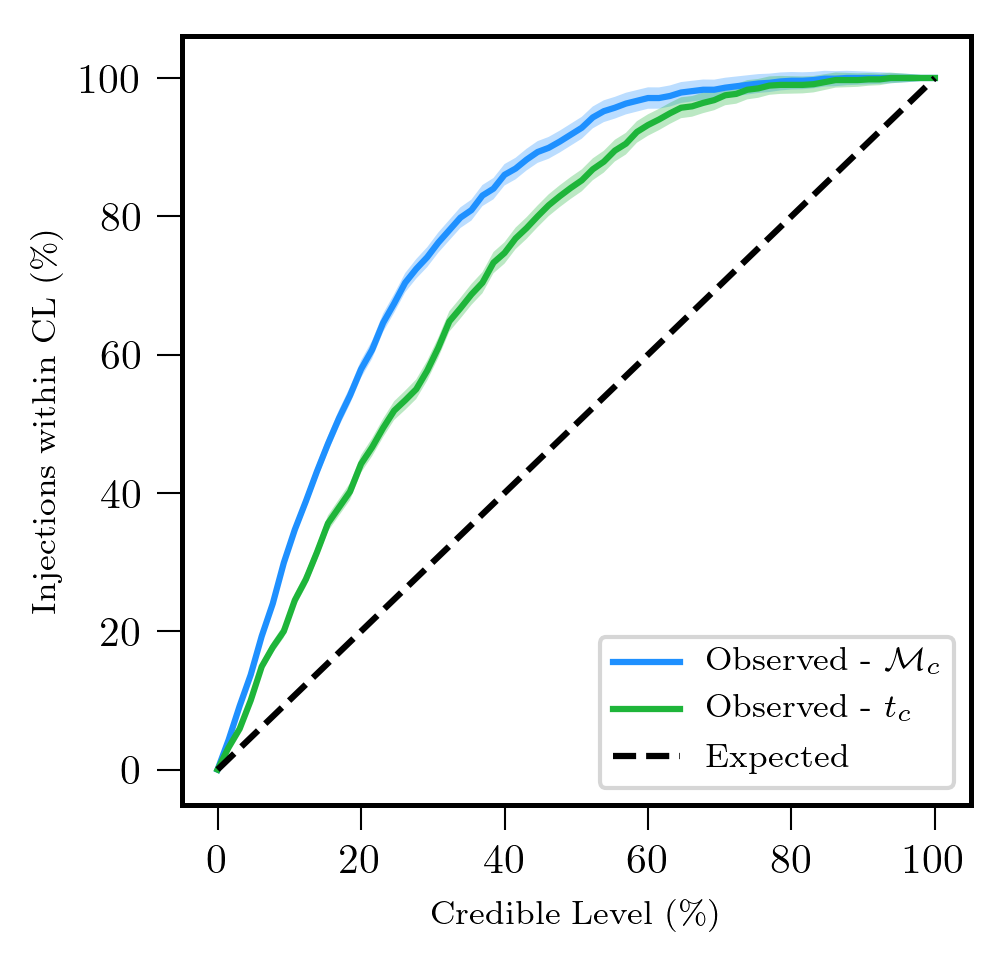

In [51]:
counts1, counts2, error, CR = p_p(*mutest, net=network_to_use, N=1000)
N=1000
y1 = counts1/N*100
y2 = counts2/N*100
yerr=100*error
ex_x = np.linspace(0, 1, 11)
ex_y = np.linspace(0, N, 11)
pp.figure(figsize=(fig_width, fig_width))
pp.ylabel('Injections within CL ($\%$)')
pp.xlabel("Credible Level ($\%$)")
pp.plot(CR*100, y1, color=dodgerblue, label='Observed - $\mathcal{M}_c$')
pp.plot(CR*100, y2, color=tanzaniagreen, markersize=2, label='Observed - $t_c$')
pp.fill_between(CR*100, y1-yerr, y1+yerr,facecolor=dodgerblue,alpha=0.3,edgecolor='none')
pp.fill_between(CR*100, y2-yerr, y2+yerr,facecolor=tanzaniagreen,alpha=0.3,edgecolor='none')
pp.plot(ex_x*100, ex_y/N*100, 'k--', label='Expected')
pp.legend(loc=4)
pp.show()

# Ringdown model

In [52]:
from ringdown import *

In [53]:
percival_network = makenet(dimensions, softmax=False)

ringdown_network = percival_network()

size=100000 #number training data
region2 = [[0.3,0.7], [3,7]] # total ranges are a [0,1], M[3, 7]

In [54]:
#ringdown_network.load_state_dict(torch.load(r'C:\Users\Luke\year-4-project-lisa\Luke\Term-2\Ringdown\Trained-Models\ringdown2_l200-1024x8_2d_10000it.pt', map_location=torch.device('cpu')))
ringdown_network.load_state_dict(torch.load(r"C:\Users\lukes\year-4-project-lisa\year-4-project-lisa\Luke\Term-2\Ringdown\Trained-Models\ringdown2_l200-1024x8_2d_10000it.pt", map_location=torch.device('cpu')))
ringdown_network.eval()

Net(
  (fc0): Linear(in_features=200, out_features=1024, bias=True)
  (fc1): Linear(in_features=1024, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=1024, bias=True)
  (fc5): Linear(in_features=1024, out_features=1024, bias=True)
  (fc6): Linear(in_features=1024, out_features=1024, bias=True)
  (fc7): Linear(in_features=1024, out_features=1024, bias=True)
  (fc8): Linear(in_features=1024, out_features=6, bias=True)
)

In [55]:
mutest2 = syntrain_RD(5000, region=region2, varx=['a', 'M'], noise=1)
a = mutest2[0][:,0]
M = mutest2[0][:,1]
idx2 = np.argsort(a)

In [7]:
#generate signals without noise to compare with network prediction
likeset_a = lambda: syntrain_RD(size=100000, varx='a', region=region2, noise=0)
likeset_M = lambda: syntrain_RD(size=100000, varx='M', region=region2, noise=0)
likeset_2_2 = lambda: syntrain_RD(size=100000, varx=['a','M'], region=region2, noise=0)

In [11]:
%%time
sl_a = synlike_RD(mutest2[2][:24,:], likeset_a, iterations=10000000)

Wall time: 4min 57s


In [12]:
%%time
sl_M = synlike_RD(mutest2[2][:24,:], likeset_M, iterations=10000000)

Wall time: 4min 51s


In [13]:
%%time
sl2_2 = synlike_RD(mutest2[2][:24,:], likeset_2_2, iterations=10000000)

Wall time: 15min 56s


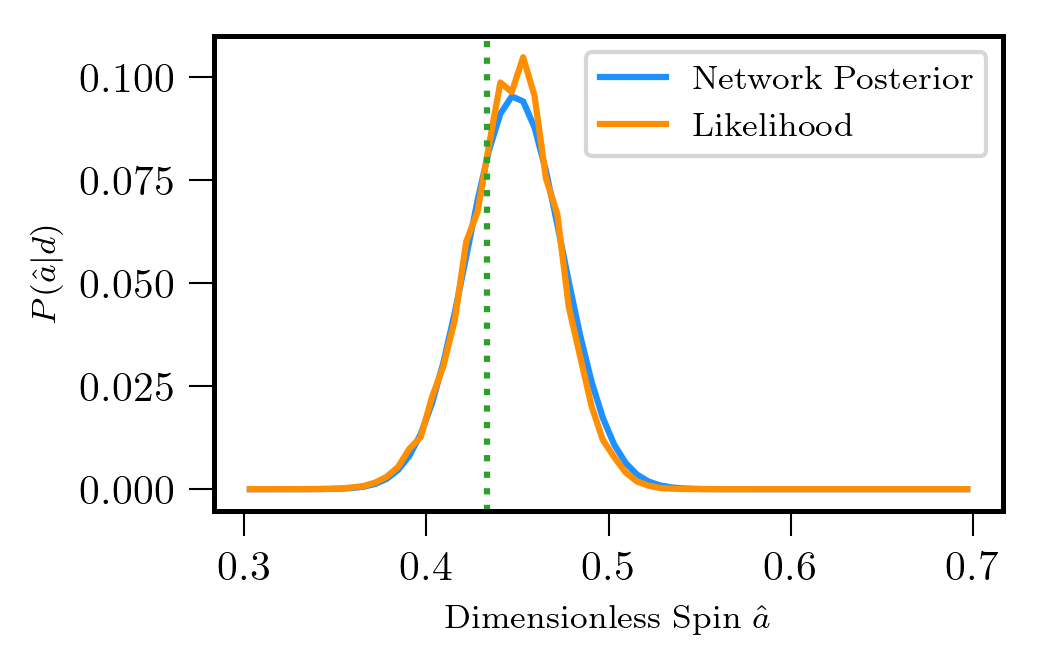

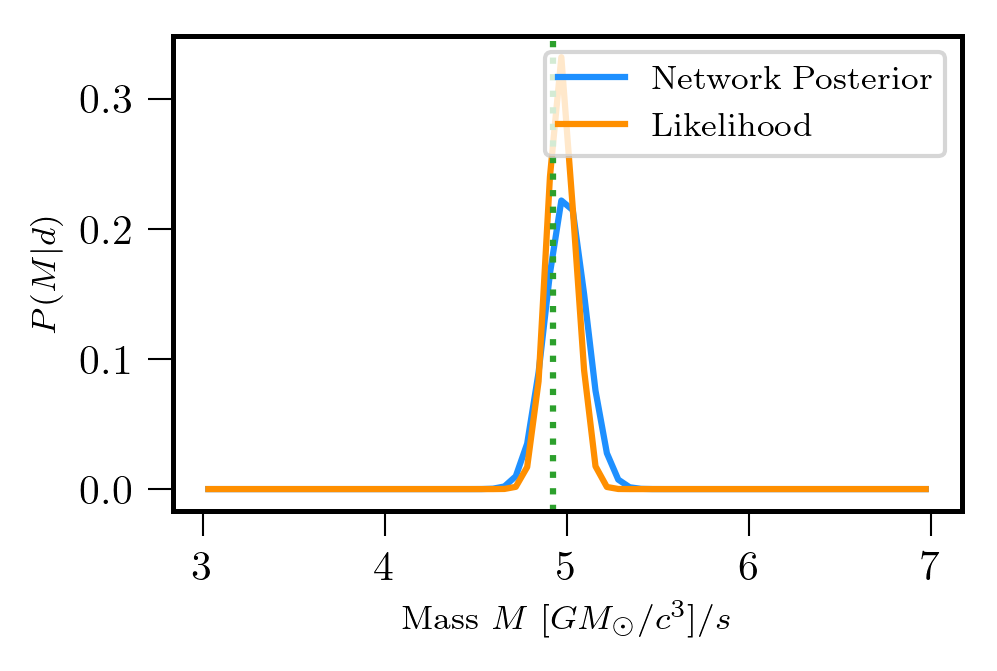

In [19]:
plotgauss_RD(*mutest2, net=ringdown_network, varx='a', like=sl_a, twodim=True, istart=2)
plotgauss_RD(*mutest2, net=ringdown_network, varx='M', like=sl_M, twodim=True, istart=2)

C:\Users\lukes\Python\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)


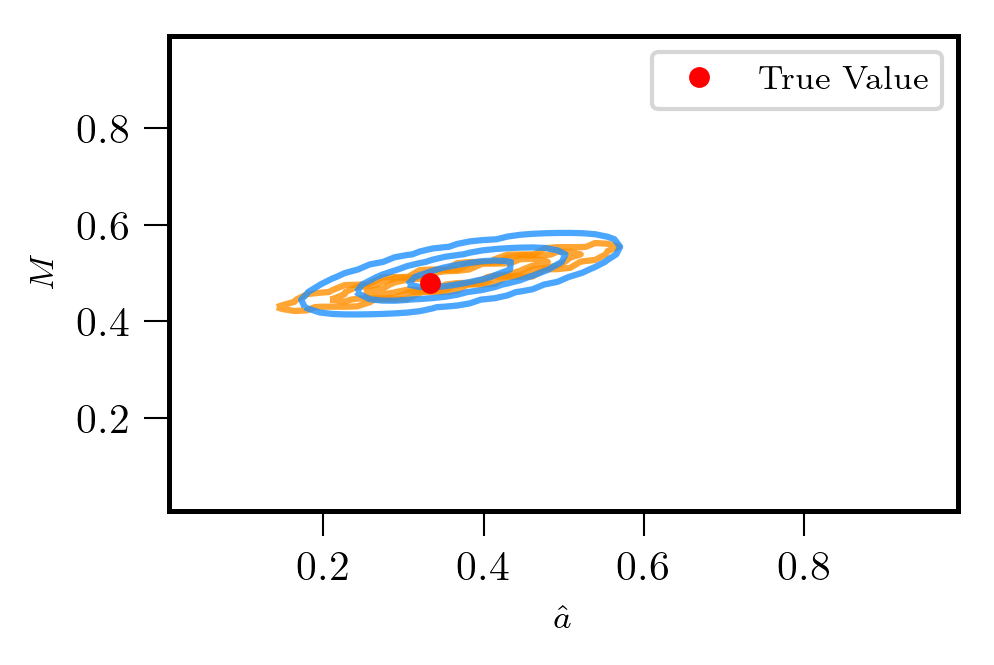

In [15]:
makecontour_RD(*mutest2, net=ringdown_network, like=sl2_2, istart=2)

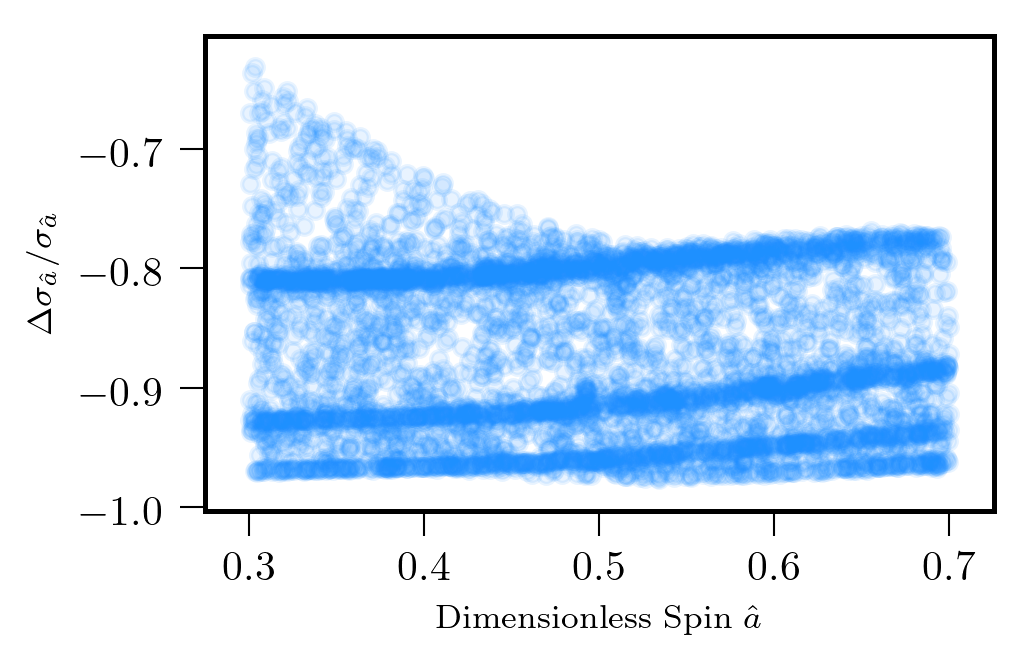

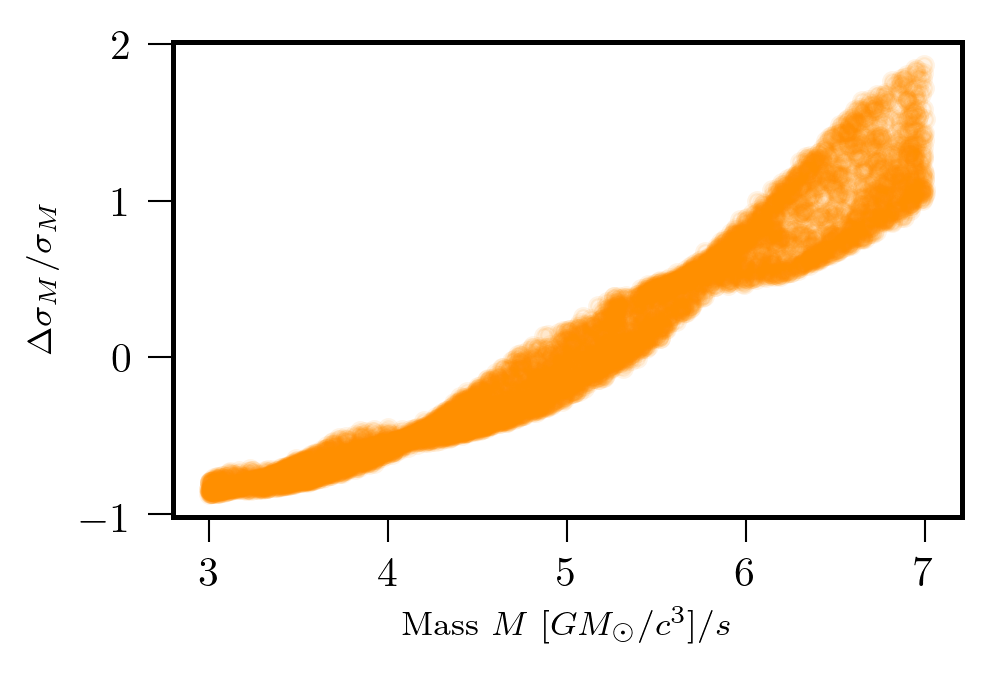

In [8]:
plotsigma_RD(*mutest2, net=ringdown_network)

In [56]:
counts3, counts4, CR = ppplots(*mutest2, net=ringdown_network)
error = err(CR)

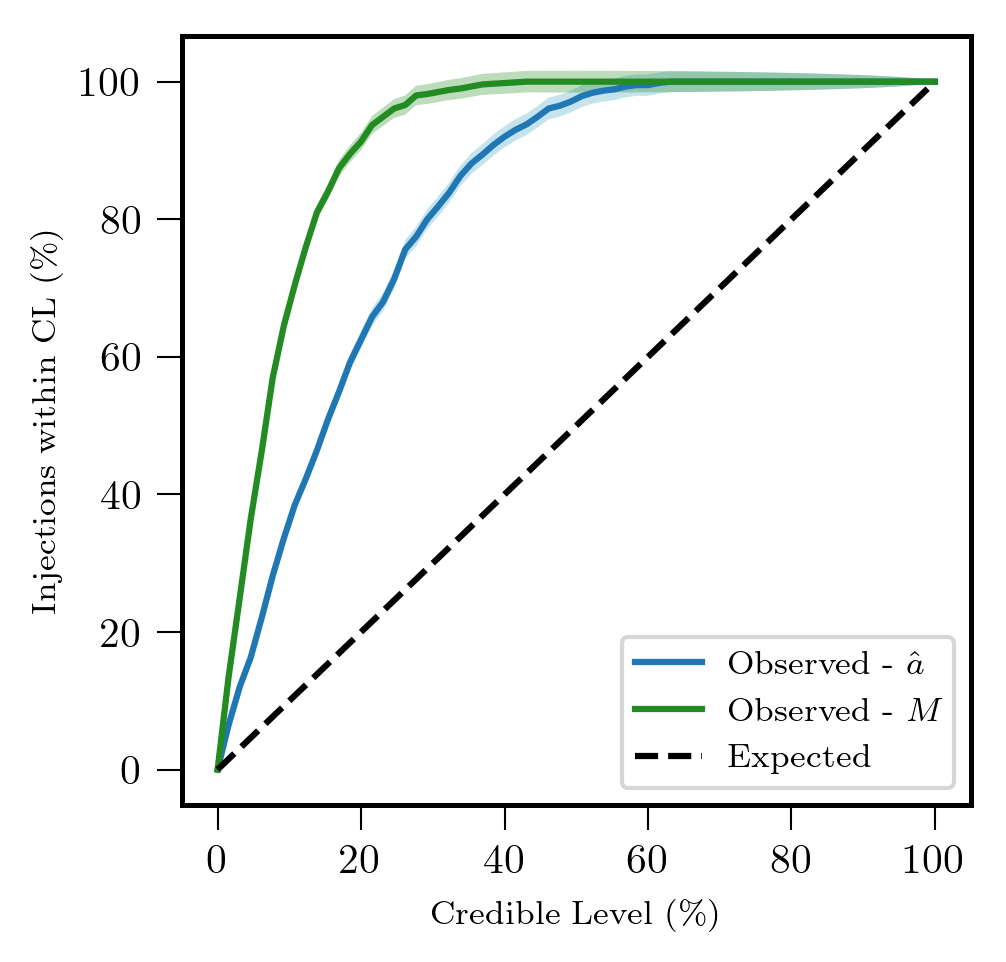

In [62]:
##plotting
N=1000
y3 = counts3/N*100
y4 = counts4/N*100
yerr=100*error
xx = np.linspace(0, 1, 11)
yy = np.linspace(0, N, 11)
pp.figure(figsize=(fig_width, fig_width))
pp.ylabel('Injections within CL ($\%$)')
pp.xlabel("Credible Level ($\%$)")
pp.plot(CR*100, y3, label='Observed - $\hat{a}$')
pp.plot(CR*100, y4, 'forestgreen', label='Observed - $M$')
pp.fill_between(CR*100, y3-yerr, y3+yerr,facecolor='lightblue',alpha=0.7,edgecolor='none')
pp.fill_between(CR*100, y4-yerr, y4+yerr,facecolor='forestgreen',alpha=0.3,edgecolor='none')
pp.plot(xx*100, yy/N*100, 'k--', label='Expected')
pp.legend()
pp.show()

# Low & high spin networks

In [57]:
region3 = [[0,0.3], [3,7]] # total ranges are a [0,1], M[3, 7]
lowspin_network = percival_network()
lowspin_network.load_state_dict(torch.load(r"C:\Users\lukes\year-4-project-lisa\year-4-project-lisa\Luke\Term-2\Ringdown\Trained-Models\ringdown2_lowspin_l200-1024x8_2d_10000it.pt", map_location=torch.device('cpu')))
lowspin_network.eval()

mutest3 = syntrain_RD(5000, region=region3, varx=['a', 'M'], noise=1)
a3 = mutest3[0][:,0]
M3 = mutest3[0][:,1]
idx3 = np.argsort(a3)

In [58]:
N=1000
counts5, counts6, CR = ppplots(*mutest3, net=lowspin_network)
y5 = counts5/N*100
y6 = counts6/N*100

In [10]:
#generate signals without noise to compare with network prediction
likeset_a_low = lambda: syntrain_RD(size=100000, varx='a', region=region3, noise=0)
likeset_M_low = lambda: syntrain_RD(size=100000, varx='M', region=region3, noise=0)
likeset_2_3 = lambda: syntrain_RD(size=100000, varx=['a','M'], region=region3, noise=0)

In [12]:
%%time
sl_a_low = synlike_RD(mutest3[2][:24,:], likeset_a_low, iterations=10000000)

Wall time: 4min 43s


In [13]:
%%time
sl_M_low = synlike_RD(mutest3[2][:24,:], likeset_M_low, iterations=10000000)

Wall time: 4min 54s


In [15]:
sl_2_low = synlike_RD(mutest3[2][:24,:], likeset_2_3, iterations=10000000)

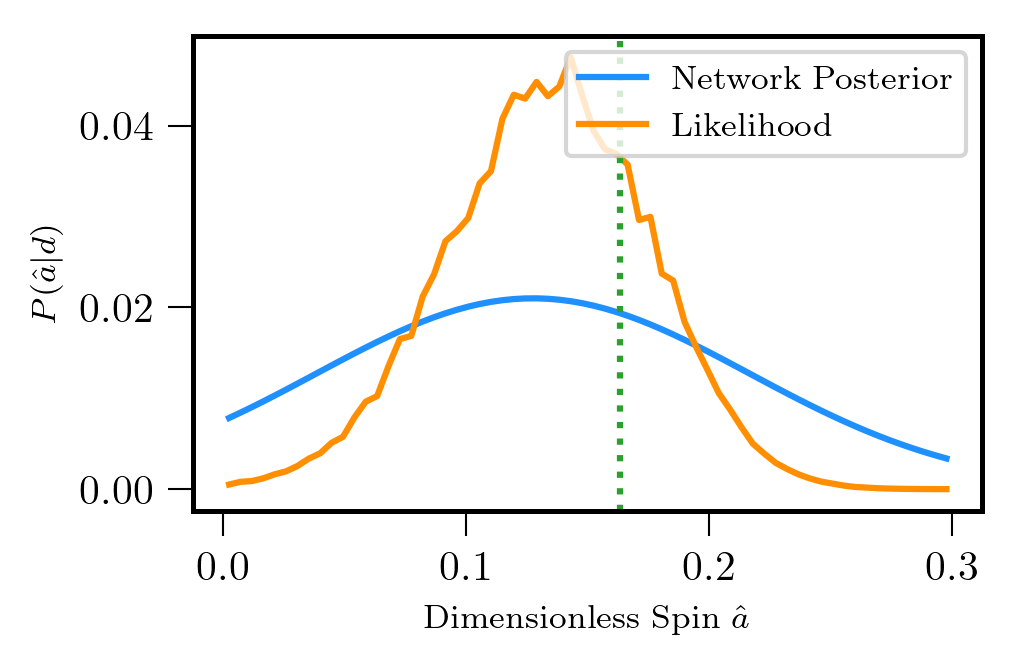

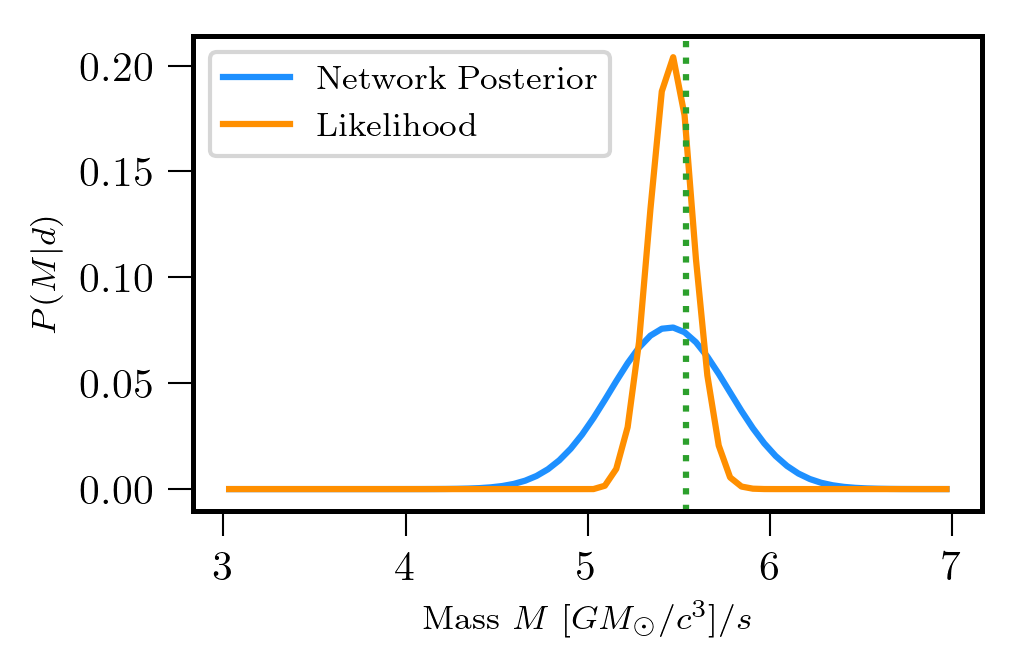

In [28]:
plotgauss_RD(*mutest3, net=lowspin_network, varx='a', region=region3, like=sl_a_low, twodim=True, istart=7)
plotgauss_RD(*mutest3, net=lowspin_network, varx='M', region=region3, like=sl_M_low, twodim=True, istart=7)

C:\Users\lukes\Python\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)


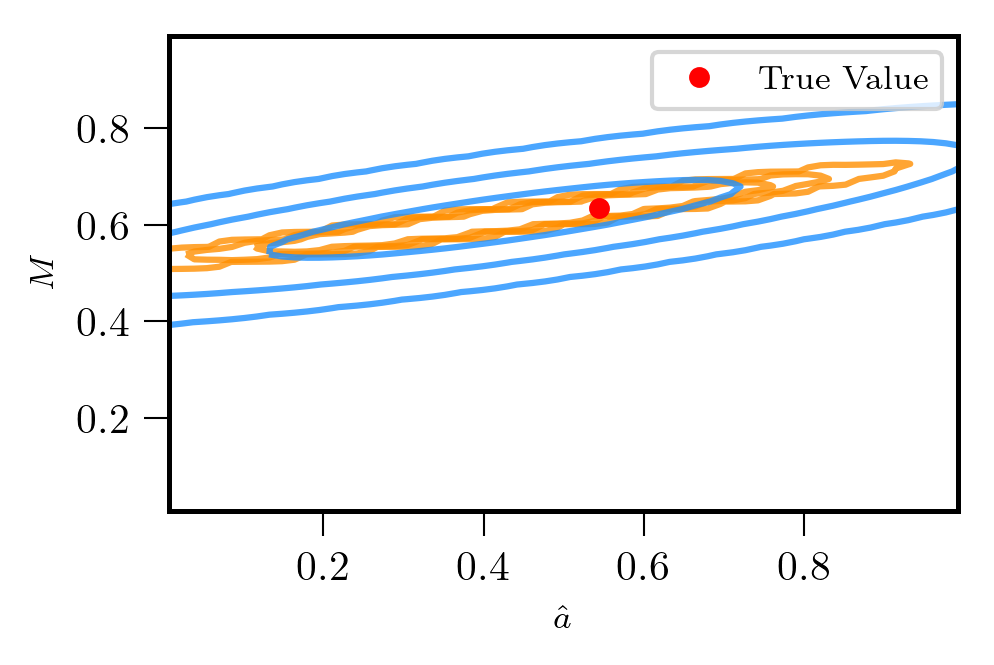

In [27]:
makecontour_RD(*mutest3, net=lowspin_network, like=sl_2_low, istart=7)

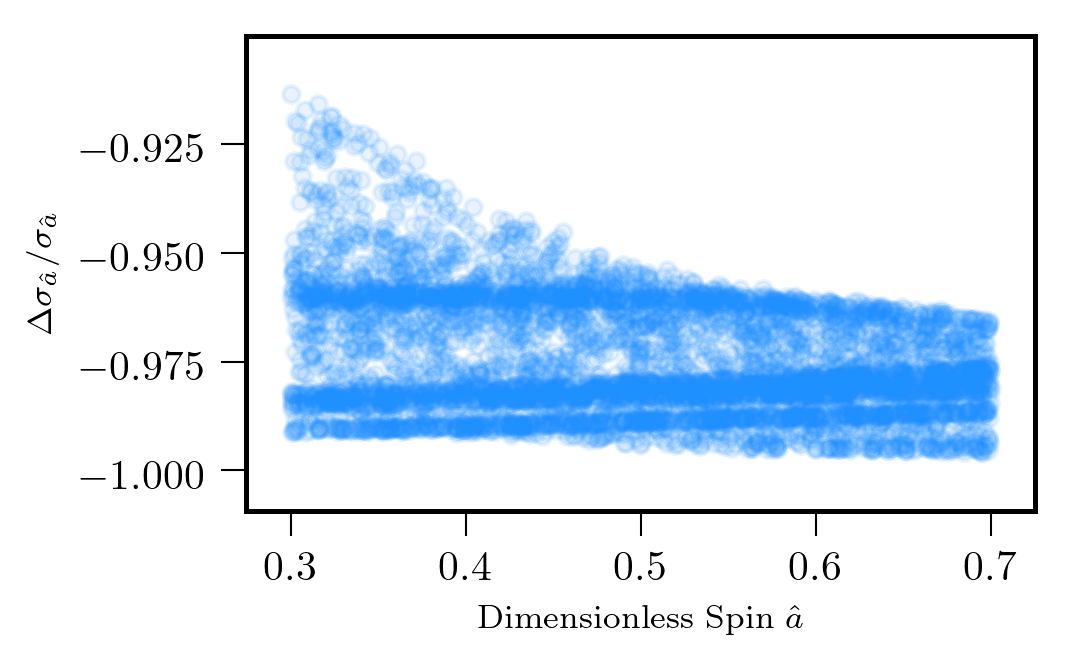

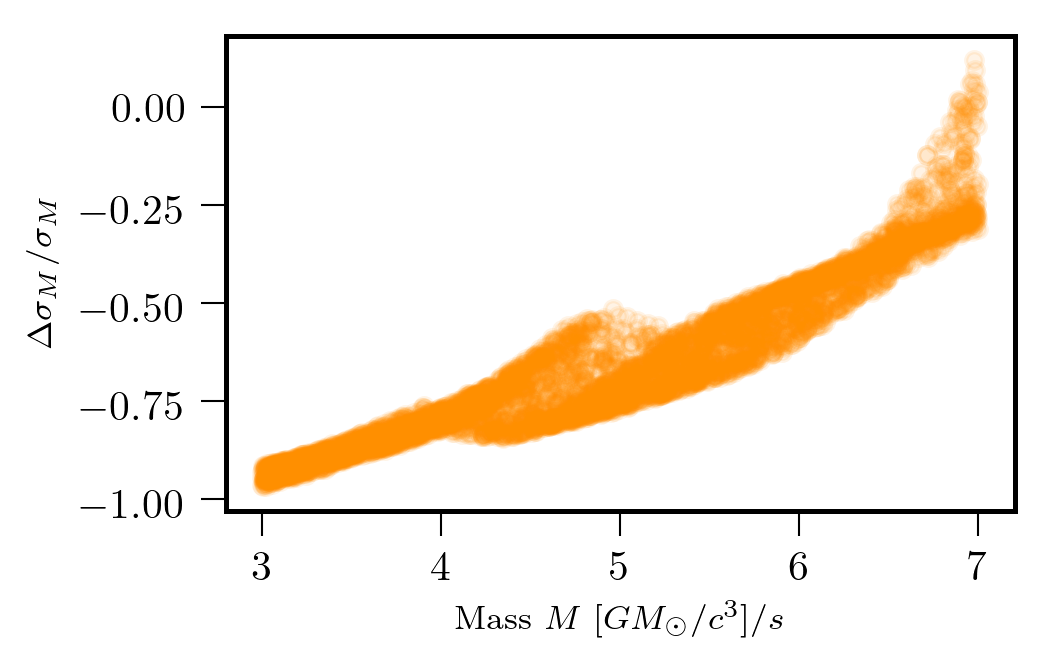

In [38]:
plotsigma_RD(*mutest3, net=lowspin_network)

In [59]:
region4 = [[0.8,0.99], [3,7]] # total ranges are a [0,1], M[3, 7]
hispin_network = percival_network()
hispin_network.load_state_dict(torch.load(r"C:\Users\lukes\year-4-project-lisa\year-4-project-lisa\Luke\Term-2\Ringdown\Trained-Models\ringdown2_hispin_l200-1024x8_2d_10000it.pt", map_location=torch.device('cpu')))
hispin_network.eval()

mutest4 = syntrain_RD(5000, region=region4, varx=['a', 'M'], noise=1)
a4 = mutest4[0][:,0]
M4 = mutest4[0][:,1]
idx4 = np.argsort(a4)

In [60]:
counts7, counts8, CR = ppplots(*mutest4, net=hispin_network)
y7 = counts7/N*100
y8 = counts8/N*100

In [30]:
#generate signals without noise to compare with network prediction
likeset_a_hi = lambda: syntrain_RD(size=100000, varx='a', region=region4, noise=0)
likeset_M_hi = lambda: syntrain_RD(size=100000, varx='M', region=region4, noise=0)
likeset_2_4 = lambda: syntrain_RD(size=100000, varx=['a','M'], region=region4, noise=0)

In [32]:
%%time
sl_a_hi = synlike_RD(mutest4[2][:24,:], likeset_a_hi, iterations=10000000)

Wall time: 3min 58s


In [33]:
%%time
sl_M_hi = synlike_RD(mutest4[2][:24,:], likeset_M_hi, iterations=10000000)

Wall time: 3min 54s


In [36]:
%%time
sl_2_4 = synlike_RD(mutest4[2][:24,:], likeset_2_4, iterations=10000000)

Wall time: 12min 42s


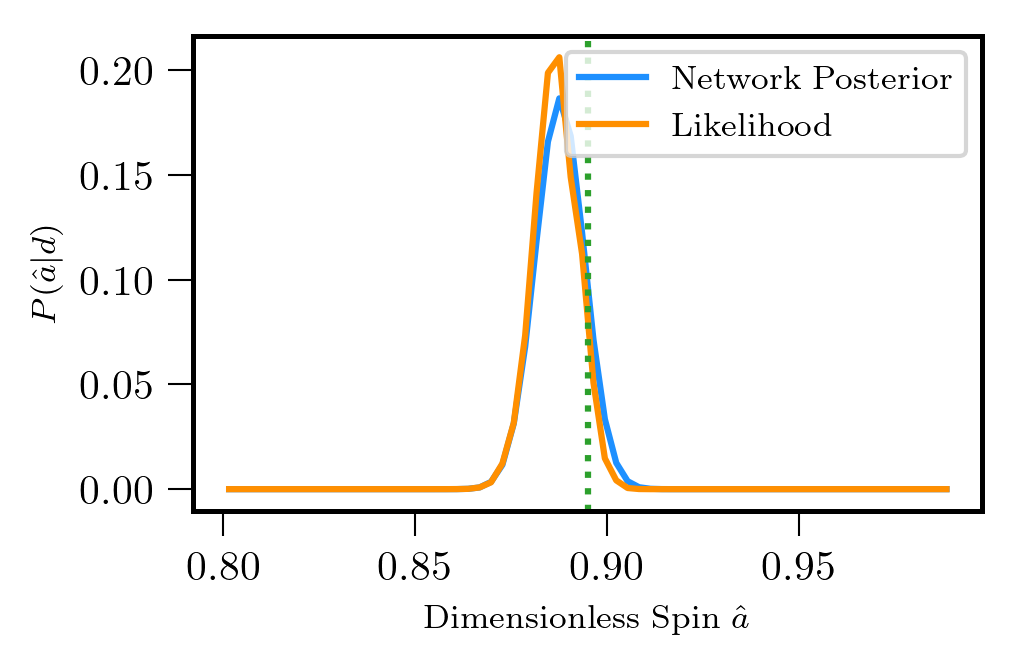

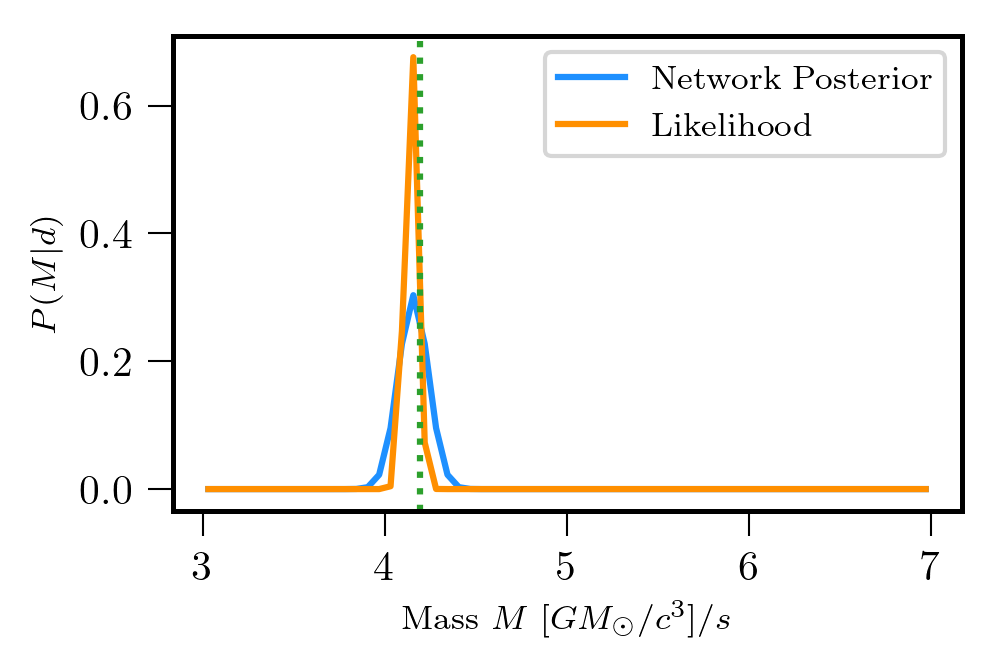

In [34]:
plotgauss_RD(*mutest4, net=hispin_network, varx='a', region=region4, like=sl_a_hi, twodim=True, istart=3)
plotgauss_RD(*mutest4, net=hispin_network, varx='M', region=region4, like=sl_M_hi, twodim=True, istart=3)

C:\Users\lukes\Python\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)


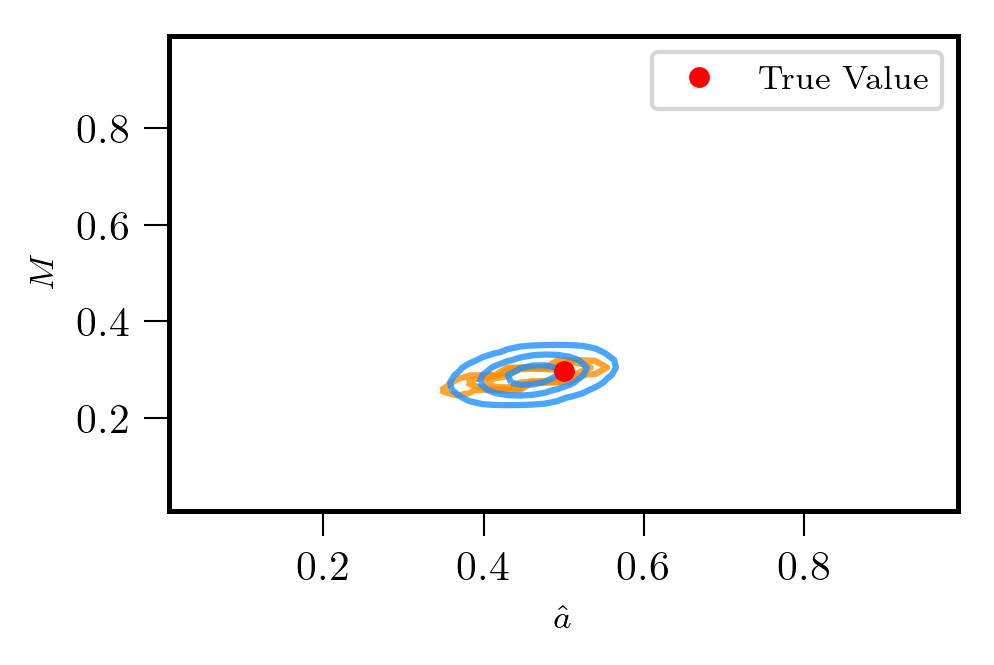

In [37]:
makecontour_RD(*mutest4, net=hispin_network, like=sl_2_4, istart=3)

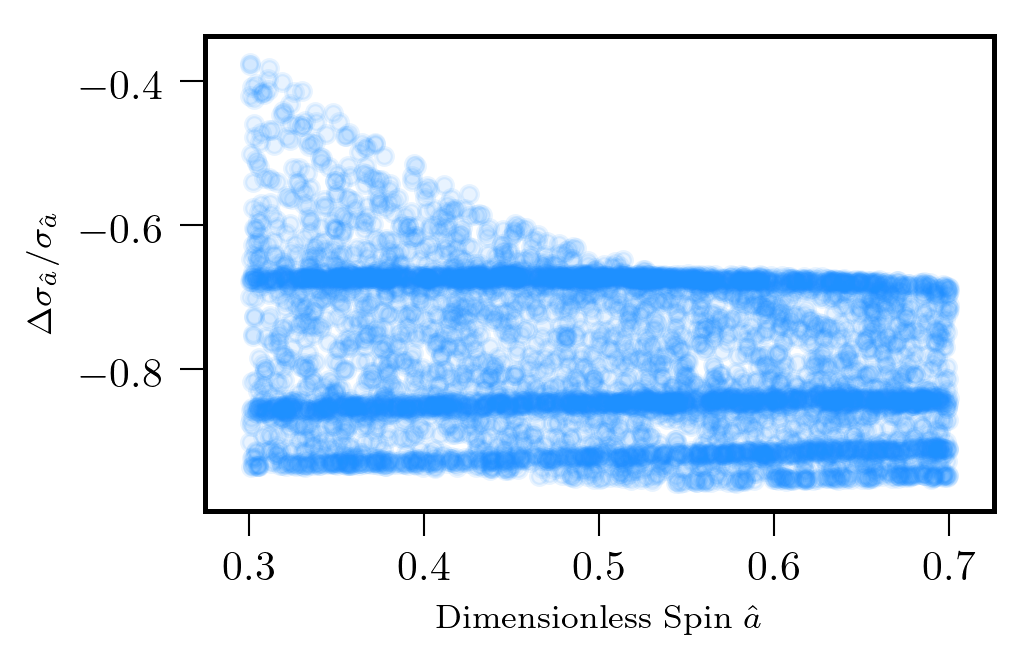

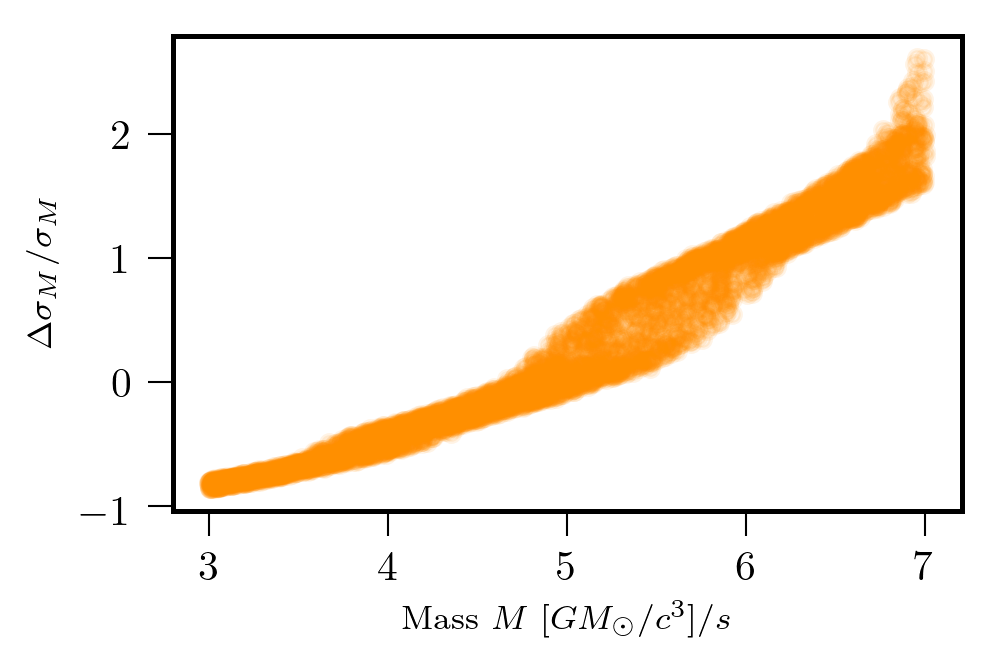

In [39]:
plotsigma_RD(*mutest4, net=hispin_network)

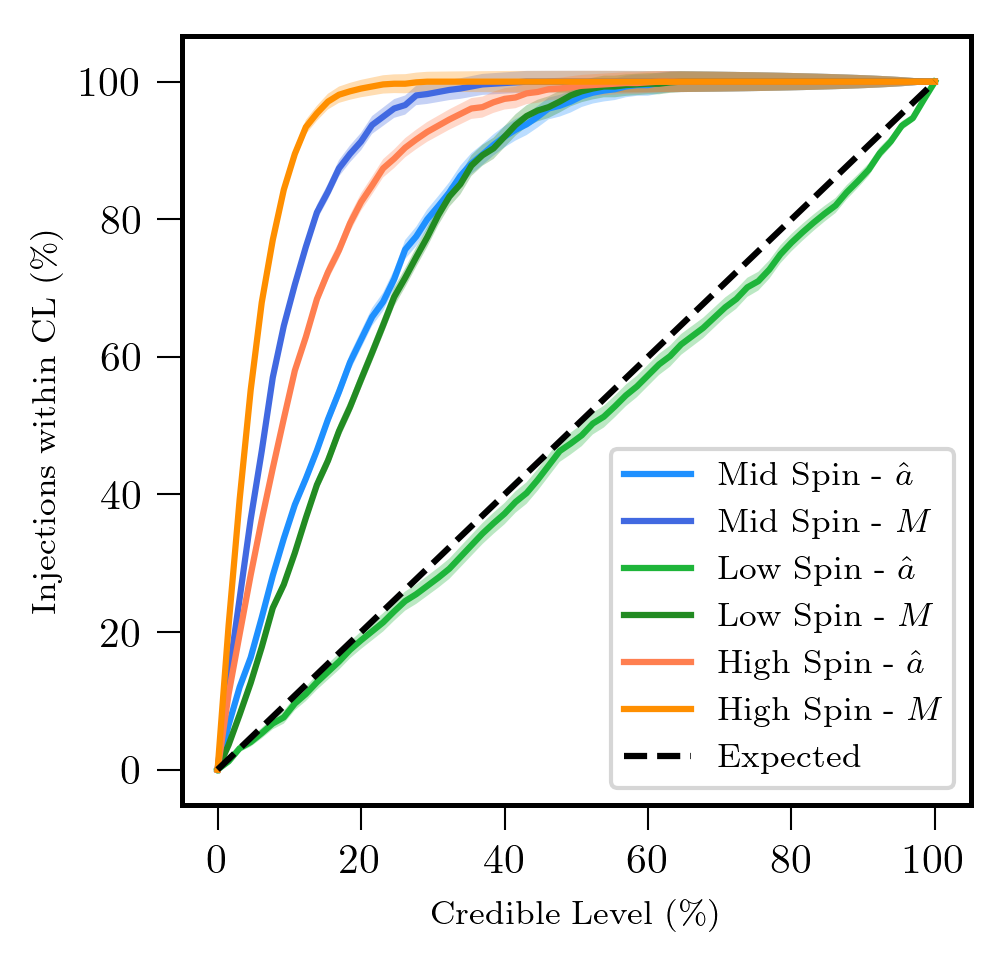

In [69]:
pp.figure(figsize=(fig_width, fig_width))
pp.ylabel('Injections within CL ($\%$)')
pp.xlabel("Credible Level ($\%$)")

pp.plot(CR*100, y3, color=dodgerblue, label='Mid Spin - $\hat{a}$')
pp.plot(CR*100, y4, 'royalblue', label='Mid Spin - $M$')
pp.plot(CR*100, y5, color=tanzaniagreen, label='Low Spin - $\hat{a}$')
pp.plot(CR*100, y6, 'forestgreen', label='Low Spin - $M$')
pp.plot(CR*100, y7, color='coral', label='High Spin - $\hat{a}$')
pp.plot(CR*100, y8, princetonorange, label='High Spin - $M$')
pp.plot(xx*100, yy/N*100, 'k--', label='Expected')

pp.fill_between(CR*100, y3-yerr, y3+yerr, facecolor=dodgerblue, alpha=0.3, edgecolor='none')
pp.fill_between(CR*100, y4-yerr, y4+yerr, facecolor='royalblue', alpha=0.3, edgecolor='none')
pp.fill_between(CR*100, y5-yerr, y5+yerr, facecolor=tanzaniagreen, alpha=0.3, edgecolor='none')
pp.fill_between(CR*100, y6-yerr, y6+yerr, facecolor='forestgreen', alpha=0.3, edgecolor='none')
pp.fill_between(CR*100, y7-yerr, y7+yerr, facecolor='coral', alpha=0.3, edgecolor='none')
pp.fill_between(CR*100, y8-yerr, y8+yerr, facecolor=princetonorange, alpha=0.3, edgecolor='none')
#pp.xlim(0,100)

pp.legend()
pp.show()